In [1]:
%matplotlib inline

In [53]:
import tifffile
import skimage
import PIL
from PIL import Image

In [3]:
import cv2

In [4]:
from skimage.external.tifffile import imread, TiffFile, imshow
from skimage.color import rgb2gray

In [5]:
from skimage import io, transform
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
import os

## Load the two landscape photos

In [44]:
temp1 = imread('template/temp_5.tif')

In [46]:
temp3 = cv2.imread(temp1, 0);

TypeError: bad argument type for built-in operation

In [58]:
pil_image = PIL.Image.open('template/template.tif').convert('RGB') 

In [59]:
print(pil_image.size)

(512, 200)


In [45]:

temp1.shape

(3, 200, 512)

In [43]:

temp3.shape


(200, 512, 3)

In [57]:
with TiffFile('template/template.tif') as tif:
     data = tif.asarray()
data.shape

(14, 3, 200, 512)

In [56]:
data.shape

(3, 200, 512)

(<matplotlib.figure.Figure at 0xc5ac6d8>,
 <matplotlib.image.AxesImage at 0xc6ffe80>)

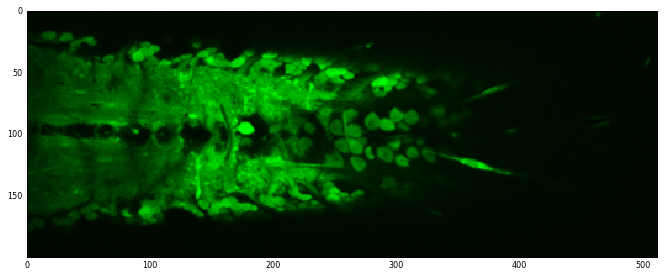

In [40]:
imshow(temp[13])

In [55]:
def  registerImage(template_image, target_image):
    
    # Read the images to be aligned
    template =  cv2.imread(template_image);
    target =  cv2.imread(target_image);
 
    # Convert images to grayscale
    template_gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
    target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
 
    # Find size of image1
    sz = template.shape
 
    # Define the motion model
    warp_mode = cv2.MOTION_TRANSLATION
 
    # Define 2x3 or 3x3 matrices and initialize the matrix to identity
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        warp_matrix = np.eye(3, 3, dtype=np.float32)
    else :
        warp_matrix = np.eye(2, 3, dtype=np.float32)
 
    # Specify the number of iterations.
    number_of_iterations = 5000;
 
    # Specify the threshold of the increment
    # in the correlation coefficient between two iterations
    termination_eps = 1e-10;
 
    # Define termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC (template_gray,target_gray,warp_matrix, warp_mode, criteria)
 
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        # Use warpPerspective for Homography 
        target_aligned = cv2.warpPerspective (target, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    else :
        # Use warpAffine for Translation, Euclidean and Affine
        target_aligned = cv2.warpAffine(target, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
 
    # Show final results
    #cv2.imshow("Image 1", template)
    #cv2.imshow("Image 2", target)
    #cv2.imshow("Aligned Image 2", target_aligned)
    #cv2.waitKey(0)
    
    return target_aligned

#path1 = "C:/Users/varshinig/Dropbox/Registration/template/temp_5.tif";
#path2 = "C:/Users/varshinig/Dropbox/Registration/control_001/slice5.tif";
#target_aligned = registerImage(path1, path2)
#cv2.imshow("Aligned Image 2", target_aligned)
#cv2.waitKey(0)

In [66]:
for i in temp:
    imshow("temp"+i,temp[i])

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U5') dtype('<U5') dtype('<U5')

255

In [89]:
# Read the images to be aligned
template =  cv2.imread('template/temp_14.tif');
target =  cv2.imread('control_001/slice_14.tif');
 
#Convert images to grayscale
template_gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

# Find size of image1
sz = template.shape
 
# Define the motion model
warp_mode = cv2.MOTION_AFFINE

# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)
 
 #Specify the number of iterations.
number_of_iterations = 10000;
 
# Specify the threshold of the increment in the correlation coefficient between two iterations
termination_eps = 1e-10;
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (template_gray,target_gray,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use warpPerspective for Homography 
    target_aligned = cv2.warpPerspective (target, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    target_aligned = cv2.warpAffine(target, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
 
 # Show final results
cv2.imshow("Image 1", template)
cv2.imshow("Image 2", target)
cv2.imshow("Aligned Image 2", target_aligned)
cv2.imwrite('aligned.png',target_aligned) 
cv2.waitKey(0)
   
   

 #path1 = "C:/Users/varshinig/Dropbox/Registration/template/temp_5.tif";
#path2 = "C:/Users/varshinig/Dropbox/Registration/control_001/slice5.tif";
#target_aligned = registerImage(path1, path2)
#cv2.imshow("Aligned Image 2", target_aligned)
#cv2.waitKey(0)

255

In [88]:
cv2.imwrite('aligned.png',target_aligned)

True

In [85]:
diff = cv2.subtract(target, target_aligned)
cv2.imshow("difference", diff)
cv2.waitKey(0)

255